<img title="GitHub Octocat" src='./img/Octocat.jpg' style='height: 60px; padding-right: 15px' alt="Octocat" align="left"> This notebook is part of a GitHub repository: https://github.com/pessini/moby-bikes 
<br>MIT Licensed
<br>Author: Leandro Pessini

# <p style="font-size:100%; text-align:left; color:#444444;">Exploratory Data Analysis (EDA)</p>

# <p style="font-size:100%; text-align:left; color:#444444;">Table of Contents:</p>
* [1. Datasets](#1)
  * [1.1 Rentals Data - Moby Bikes](#1.1)
  * [1.2 Weather Data - Met Éireann](#1.2)
* [2. Preprocessing & Feature Engineering](#2)
  * [2.1 Target variable distribution](#2.1)
  * [2.2 Missing values](#2.2)
  * [2.3 Exploratory Analysis](#2.3)
  * [2.4 Features Importance](#2.4)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
hourly_data = pd.read_csv('../data/interim/hourly_data.csv')
all_data = pd.read_csv('../data/interim/all_data.csv')
rentals = pd.read_csv('../data/interim/new_features_rentals.csv')
hourly_data.head()

,rental_date,rental_hour,holiday,dayofweek,working_day,season,peak,rain,temp,rhum,wdsp,count
0,2021-02-01,6,False,0,True,3,1,0.0,3.4,98.0,3,1
1,2021-02-01,8,False,0,True,3,1,0.0,3.5,93.0,4,2
2,2021-02-01,9,False,0,True,3,1,0.0,2.6,93.0,2,4
3,2021-02-01,10,False,0,True,3,1,0.0,4.1,97.0,4,3
4,2021-02-01,11,False,0,True,3,0,0.0,5.2,86.0,6,12


- Hourly trend
- Holiday
- Working_day
- Season

## Viz

- Hour x Count by Season
- Hour x Count by day of week
- Hour x Count by temperature
- Battery
- Duration of rentals

### Rentals by Season

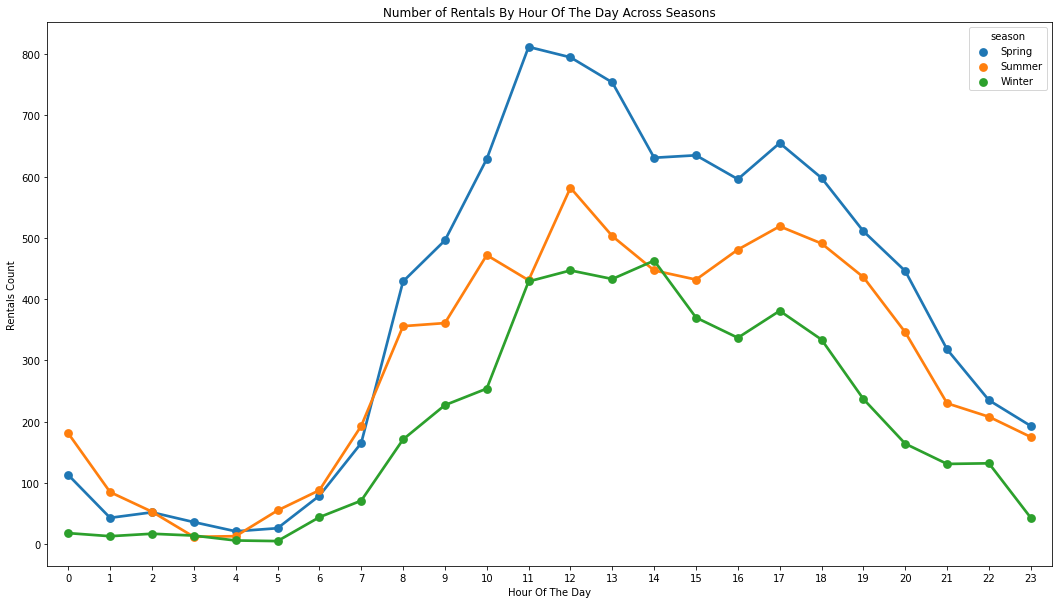

In [3]:
# 0 - Spring | 1 - Summer | 2 - Autumn | 3 - Winter
season_map = {0:'Spring', 1:'Summer', 2:'Fall', 3:'Winter'}
season_freq = hourly_data.groupby(['season', 'rental_hour'])['count'].agg('sum').reset_index(name='count')
season_freq['season'] = season_freq['season'].map(lambda d : season_map[d])
fig, ax = plt.subplots(figsize=(18, 10))
sns.pointplot(x=season_freq["rental_hour"], y=season_freq["count"], hue=season_freq["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', title="Number of Rentals By Hour Of The Day Across Seasons")
plt.show()

### Season

Summer data is low due to the last data collected is August 31st and the summer is yet not finished. **Decided to not use the season as a predictor** for now and after the changing of season the model will be rebuild adding this feature.

### Rentals by Days of the Week

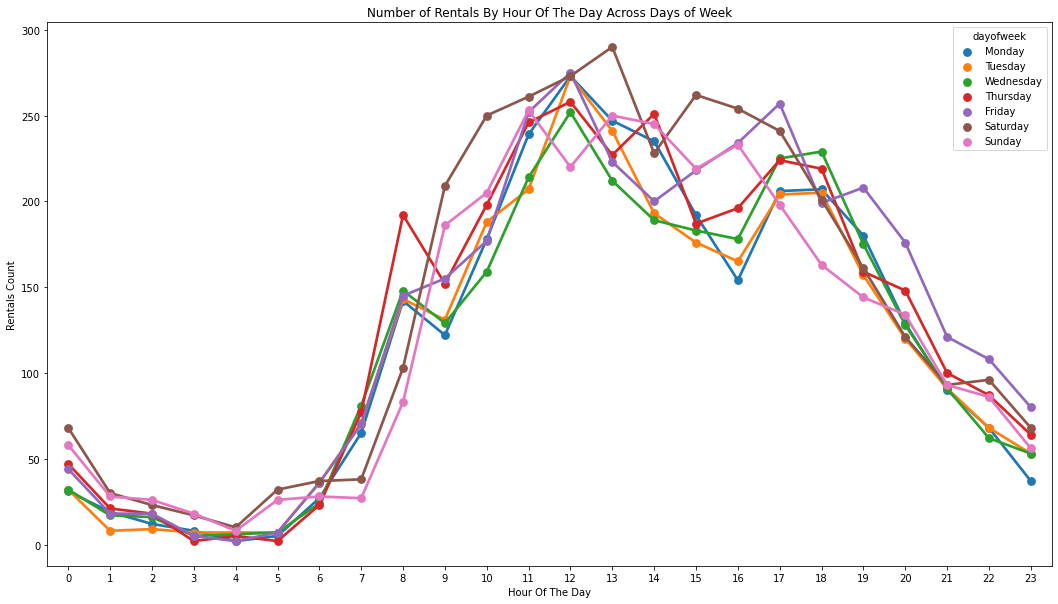

In [4]:
day_of_week_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
day_of_week = hourly_data.groupby(['dayofweek', 'rental_hour'])['count'].agg('sum').reset_index(name='count')
day_of_week['dayofweek'] = day_of_week['dayofweek'].map(lambda d : day_of_week_map[d])
fig, ax = plt.subplots(figsize=(18, 10))
sns.pointplot(x=day_of_week["rental_hour"], y=day_of_week["count"], hue=day_of_week["dayofweek"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Rentals Count', title="Number of Rentals By Hour Of The Day Across Days of Week")
plt.show()

## Battery distribution

In [5]:
battery_dist = all_data.copy()

def group_battery_status(df):

    bins= [0,30,50,80,100]
    labels = ['< 30%','30% - 50%','50% - 80%','> 80%']
    battery_dist['battery_status'] = pd.cut(battery_dist['start_battery'], bins=bins, labels=labels, right=False)

    s = battery_dist.battery_status
    counts = s.value_counts()
    percent = s.value_counts(normalize=True)
    percent100 = s.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    return pd.DataFrame({'counts': counts, 'per': percent, 'per100': percent100}, labels)

In [6]:
group_battery_status(battery_dist)

,counts,per,per100
< 30%,2156,0.103819,10.4%
30% - 50%,3453,0.166273,16.6%
50% - 80%,8543,0.411374,41.1%
> 80%,6615,0.318534,31.9%


<AxesSubplot:xlabel='start_battery', ylabel='Count'>

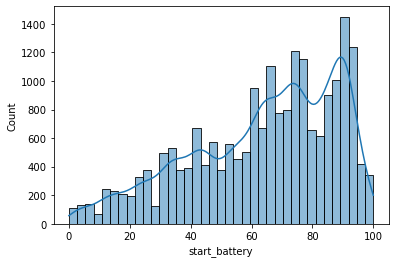

In [7]:
sns.histplot(data=rentals, x='start_battery', kde=True)

In [8]:
all_data['duration'].mean()

899.8147748779363

## BoxPlot analysis

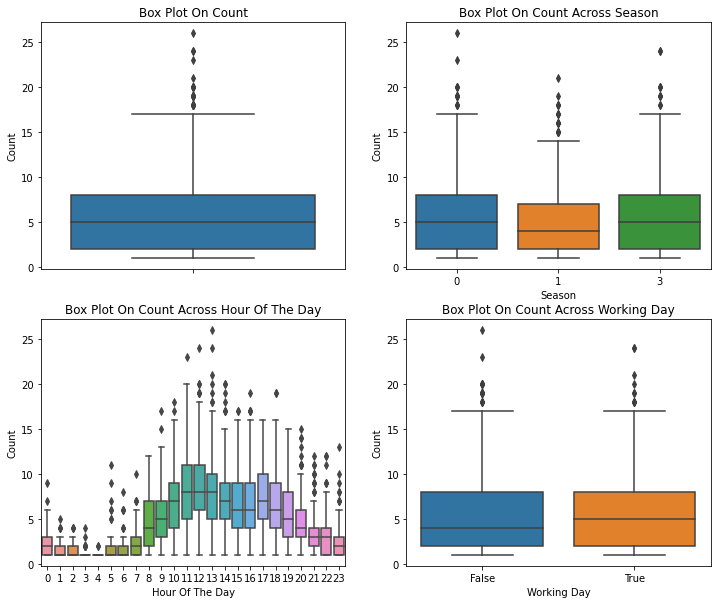

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=hourly_data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=hourly_data,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=hourly_data,y="count",x="rental_hour",orient="v",ax=axes[1][0])
sns.boxplot(data=hourly_data,y="count",x="working_day",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

plt.show()

In [10]:
hourly_data[hourly_data['count'] > 20]

,rental_date,rental_hour,holiday,dayofweek,working_day,season,peak,rain,temp,rhum,wdsp,count
769,2021-03-17,13,True,2,True,3,0,0.0,11.4,66.0,11,24
806,2021-03-19,12,False,4,True,3,0,0.0,10.2,80.0,4,24
1077,2021-04-03,11,False,5,False,0,0,0.0,10.1,65.0,7,23
1331,2021-04-17,13,False,5,False,0,0,0.0,11.3,56.0,14,26
2570,2021-06-22,13,False,1,True,1,0,0.0,16.9,44.0,7,21


## Correlation Matrix

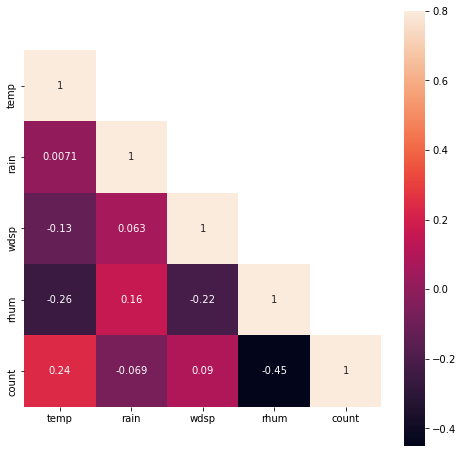

In [11]:
corrMatt = hourly_data[['temp','rain','wdsp','rhum','count']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)
plt.show()

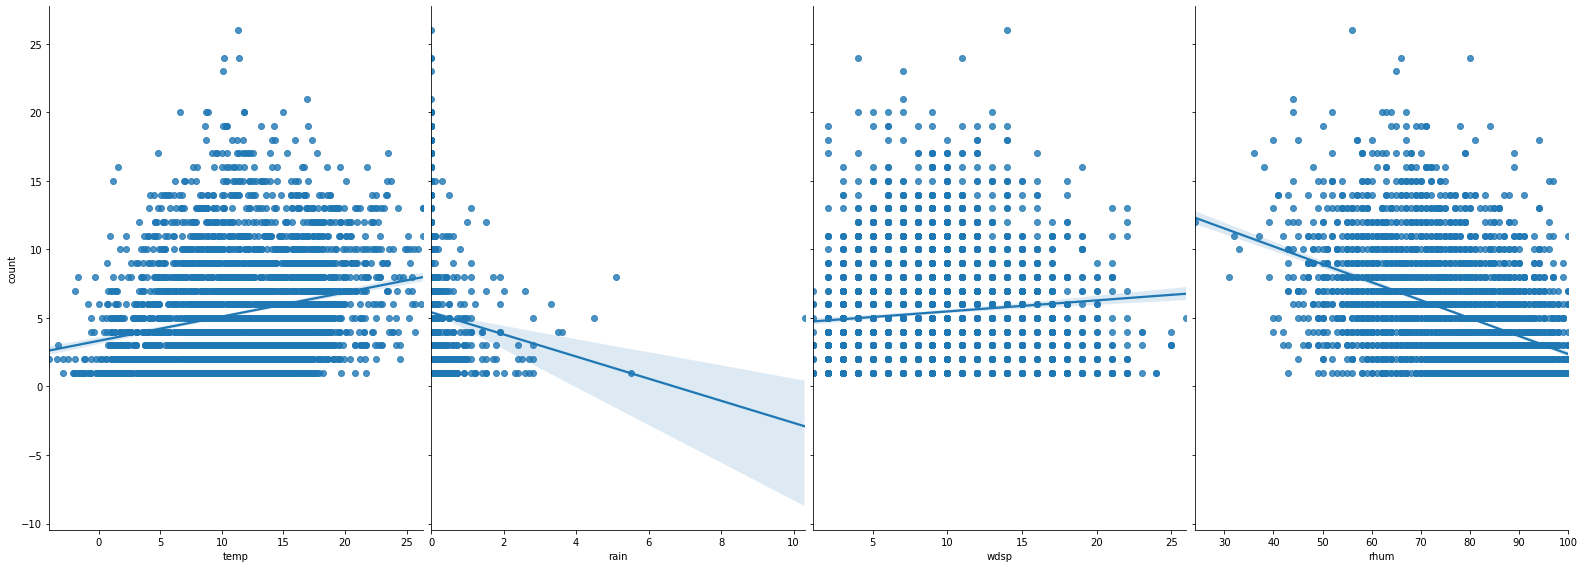

In [12]:
sns.pairplot(hourly_data, x_vars=['temp','rain','wdsp','rhum'], y_vars='count', height=8, aspect=0.7, kind="reg", palette='Set1')
plt.show()

## Distribution of numerical features

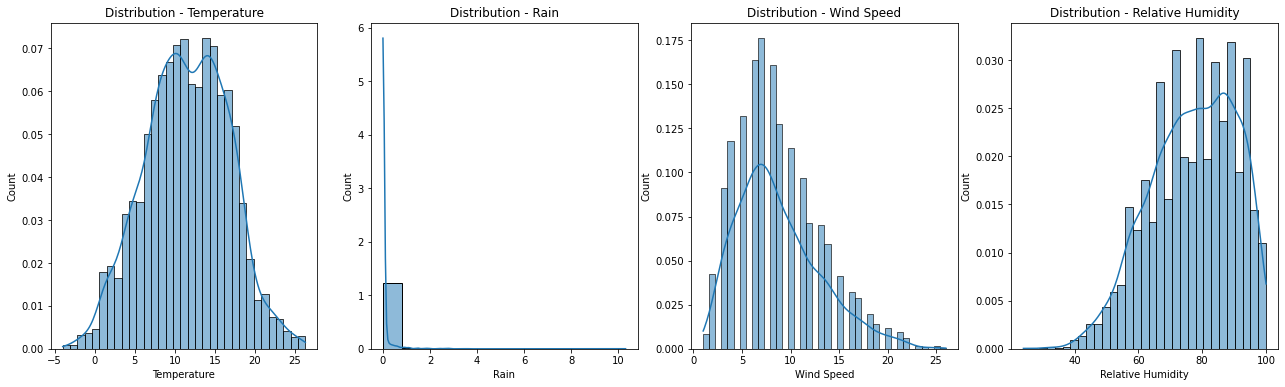

In [13]:
fig = plt.figure(figsize=(22,6))
gs = fig.add_gridspec(1, 4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[0, 3])

sns.histplot(hourly_data['temp'],ax=ax0, stat='density', kde=True)
sns.histplot(hourly_data['rain'],ax=ax1, stat='density', kde=True)
sns.histplot(hourly_data['wdsp'],ax=ax2, stat='density', kde=True)
sns.histplot(hourly_data['rhum'],ax=ax3, stat='density', kde=True)

ax0.set(xlabel='Temperature',ylabel='Count',title="Distribution - Temperature")
ax1.set(xlabel='Rain', ylabel='Count',title="Distribution - Rain")
ax2.set(xlabel='Wind Speed', ylabel='Count',title="Distribution - Wind Speed")
ax3.set(xlabel='Relative Humidity', ylabel='Count',title="Distribution - Relative Humidity")

plt.show()

In [14]:
from sklearn.decomposition import PCA

In [15]:
hourly_data.head()

,rental_date,rental_hour,holiday,dayofweek,working_day,season,peak,rain,temp,rhum,wdsp,count
0,2021-02-01,6,False,0,True,3,1,0.0,3.4,98.0,3,1
1,2021-02-01,8,False,0,True,3,1,0.0,3.5,93.0,4,2
2,2021-02-01,9,False,0,True,3,1,0.0,2.6,93.0,2,4
3,2021-02-01,10,False,0,True,3,1,0.0,4.1,97.0,4,3
4,2021-02-01,11,False,0,True,3,0,0.0,5.2,86.0,6,12


## PCA

In [24]:
df = hourly_data.copy()
#df = hourlyDataWithoutOutliers.copy()
#df = transform_data.copy()
df = df.astype({'holiday': 'category', 'dayofweek': 'category', 'working_day': 'category', 'peak': 'category'})
predictors = ['holiday','dayofweek','working_day','peak']
numerical_data = df.filter(['rain','temp','wdsp','rhum'], axis=1)

X = df[[c for c in df.columns if c in predictors]]
y = df.pop('count')

In [25]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(numerical_data)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [26]:
principalDf.head()

,principal component 1,principal component 2
0,-22.068046,3.505389
1,-17.027986,4.191173
2,-17.280833,4.177974
3,-20.922583,3.357571
4,-9.749661,3.985141


<img title="GitHub Mark" src="./img/GitHub-Mark-64px.png" style="height: 32px; padding-right: 15px" alt="GitHub Mark" align="left"> [GitHub repository](https://github.com/pessini/moby-bikes) <br>Author: Leandro Pessini